## Import Libraries and the Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [4]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'

df = pd.read_csv(URL)

## Data Description


| Variable    | Description                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| minority    | Does the instructor belong to a minority (non-Caucasian) group?                                                                                      |
| age         | The professor's age                                                                                                                                  |
| gender      | Indicating whether the instructor was male or female.                                                                                                |
| credits     | Is the course a single-credit elective?                                                                                                              |
| beauty      | Rating of the instructor's physical appearance by a panel of six students averaged across the six panelists and standardized to have a mean of zero. |
| eval        | Course overall teaching evaluation score, on a scale of 1 (very unsatisfactory) to 5 (excellent).                                                    |
| division    | Is the course an upper or lower division course?                                                                                                     |
| native      | Is the instructor a native English speaker?                                                                                                          |
| tenure      | Is the instructor on a tenure track?                                                                                                                 |
| students    | Number of students that participated in the evaluation.                                                                                              |
| allstudents | Number of students enrolled in the course.                                                                                                           |
| prof        | Indicating instructor identifier.                                                                                                                    |


In [30]:
df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


## Exercises

### 1. Can you identify whether the teachers' Rating data is a time series or cross-sectional?

In [5]:
df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


The data is cross-sectional, which means the measurements were taken at a single point in time.

### 2. Find the mean, median, minimum, and maximum values for students


In [10]:
mean = df['students'].mean()
median = df['students'].median()
min = df['students'].min()
max = df['students'].max()

print(f"Mean: {np.round(mean, 2)}")
print(f"Median: {median}")
print(f"Minimum: {min}")
print(f"Maximum: {max}")

Mean: 36.62
Median: 23.0
Minimum: 5
Maximum: 380


### 3. Produce a descriptive statistics table

In [37]:
df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.00,463.00,463.00,463.00,463.00,463.00,463.00,463.00,463.00,463.00,463.00,463.00,463.00
mean,48.37,0.00,4.00,36.62,55.18,45.43,0.20,0.14,0.42,0.06,0.66,0.94,0.78
std,9.80,0.79,0.55,45.02,75.07,27.51,0.40,0.35,0.49,0.23,0.47,0.24,0.41
min,29.00,-1.45,2.10,5.00,8.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,42.00,-0.66,3.60,15.00,19.00,20.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
50%,48.00,-0.07,4.00,23.00,29.00,44.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
75%,57.00,0.55,4.40,40.00,60.00,70.50,0.00,0.00,1.00,0.00,1.00,1.00,1.00
max,73.00,1.97,5.00,380.00,581.00,94.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 4. Create a histogram of the beauty variable and briefly comment on the distribution of data

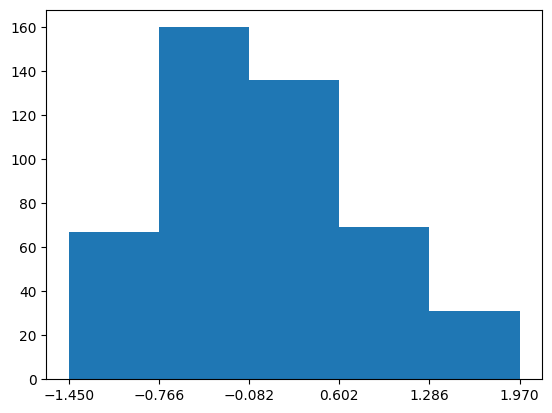

In [36]:
bins = plt.hist(df['beauty'], bins=5)[1]
plt.xticks(bins)
plt.show()

**Conclusions:**  
* Most of the data for beauty is between -0.766 and 0.602.
* The distribution is skewed to the right, therefore the mean is close to 0. 

### 5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [46]:
beauty_by_gender = df.groupby(by='gender').agg({
    'beauty': ['mean', 'std', 'var']
}).reset_index()
beauty_by_gender

gender beauty          
            mean  std  var
0  female   0.12 0.82 0.67
1    male  -0.08 0.76 0.57

**Conclusions:**  
* Yes. Beauty score for women is higher than men.